In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [221]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [223]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00.000,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00.000,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00.000,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00.000,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00.000,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425


In [225]:
df.shape

(7748, 10)

In [227]:
df.tail()

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
7743,2024-06-12 20:00:00.000,4.373425,4.483142,4.300413,4.495069,4.439222,5.585535,7.878193,7.592293,4.167729
7744,2024-06-12 21:00:00.000,4.374073,4.482854,4.301687,4.494333,4.439609,5.582193,7.877029,7.593216,4.167895
7745,2024-06-12 22:00:00.000,4.375431,4.483341,4.304706,4.495460,4.439438,5.579660,7.880521,7.605413,4.167374
7746,2024-06-12 23:00:00.000,4.373557,4.482985,4.309968,4.494287,4.439528,5.576629,7.880730,7.593132,4.168333
7747,2024-06-13 00:00:00.000,4.374814,4.483509,4.307608,4.493996,4.439603,5.574546,7.881895,7.589359,4.168072


In [229]:
df['dt'] = pd.to_datetime(df['dt'])
df['time_diff'] = df['dt'].diff()
df.loc[0, 'time_diff'] = df['time_diff'].iloc[1]

In [231]:
df.head()

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff
0,2023-07-28 05:00:00,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151,0 days 01:00:00
1,2023-07-28 06:00:00,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072,0 days 01:00:00
2,2023-07-28 07:00:00,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076,0 days 01:00:00
3,2023-07-28 08:00:00,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253,0 days 01:00:00
4,2023-07-28 09:00:00,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425,0 days 01:00:00


In [233]:
df['time_diff_hour'] = df['time_diff'].apply(lambda x: x.total_seconds() / 3600)
df.head()

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour
0,2023-07-28 05:00:00,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151,0 days 01:00:00,1.0
1,2023-07-28 06:00:00,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072,0 days 01:00:00,1.0
2,2023-07-28 07:00:00,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076,0 days 01:00:00,1.0
3,2023-07-28 08:00:00,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253,0 days 01:00:00,1.0
4,2023-07-28 09:00:00,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425,0 days 01:00:00,1.0


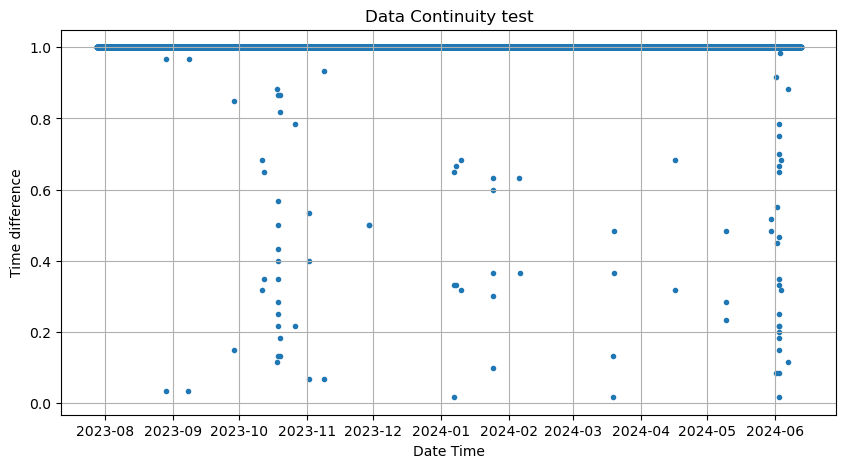

In [235]:
plt.figure(figsize=(10, 5))
plt.scatter(df['dt'],df['time_diff_hour'], marker='.')
plt.title('Data Continuity test')
plt.xlabel('Date Time')
plt.ylabel('Time difference')
plt.grid(True)
plt.show()

In [237]:
test = df[df["time_diff_hour"] != 1]
test

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour
755,2023-08-28 15:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333
756,2023-08-28 16:00:00,4.019926,4.230850,4.155974,4.215975,NaN,5.322548,8.044975,NaN,3.793770,0 days 00:58:00,0.966667
1005,2023-09-08 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333
1006,2023-09-08 01:00:00,4.032484,NaN,4.165020,NaN,NaN,5.364047,8.175061,NaN,3.807333,0 days 00:58:00,0.966667
1499,2023-09-28 13:51:00,NaN,NaN,4.149106,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:51:00,0.850000
...,...,...,...,...,...,...,...,...,...,...,...,...
7509,2024-06-03 04:00:00,4.360615,4.467685,4.325242,4.479211,4.540410,4.932591,7.829799,7.506456,4.152609,0 days 00:59:00,0.983333
7521,2024-06-03 15:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:41:00,0.683333
7522,2024-06-03 16:00:00,4.360556,4.467761,4.325458,4.481596,4.512019,4.971986,7.830640,7.502821,4.153644,0 days 00:19:00,0.316667
7601,2024-06-06 22:07:00,4.378150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:07:00,0.116667


In [239]:
test = test.copy()
test["na_count"] = test.isna().sum(axis = 1)
test

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour,na_count
755,2023-08-28 15:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333,9
756,2023-08-28 16:00:00,4.019926,4.230850,4.155974,4.215975,NaN,5.322548,8.044975,NaN,3.793770,0 days 00:58:00,0.966667,2
1005,2023-09-08 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333,9
1006,2023-09-08 01:00:00,4.032484,NaN,4.165020,NaN,NaN,5.364047,8.175061,NaN,3.807333,0 days 00:58:00,0.966667,4
1499,2023-09-28 13:51:00,NaN,NaN,4.149106,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:51:00,0.850000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,2024-06-03 04:00:00,4.360615,4.467685,4.325242,4.479211,4.540410,4.932591,7.829799,7.506456,4.152609,0 days 00:59:00,0.983333,0
7521,2024-06-03 15:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:41:00,0.683333,9
7522,2024-06-03 16:00:00,4.360556,4.467761,4.325458,4.481596,4.512019,4.971986,7.830640,7.502821,4.153644,0 days 00:19:00,0.316667,0
7601,2024-06-06 22:07:00,4.378150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:07:00,0.116667,8


In [241]:
remove = test[test["na_count"] == 9]
remove

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour,na_count
755,2023-08-28 15:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333,9
1005,2023-09-08 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:00,0.033333,9
1814,2023-10-11 15:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:19:00,0.316667,9
1981,2023-10-18 12:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:53:00,0.883333,9
1988,2023-10-18 15:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:13:00,0.216667,9
2012,2023-10-19 12:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:52:00,0.866667,9
2014,2023-10-19 13:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:49:00,0.816667,9
2183,2023-10-26 13:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:47:00,0.783333,9
2336,2023-11-01 21:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:00,0.066667,9
2337,2023-11-01 21:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:24:00,0.400000,9


In [243]:
remove = remove.drop(columns = ["na_count"])
remove.shape

(20, 12)

In [245]:
df_filtered = df[~df.apply(tuple,1).isin(remove.apply(tuple,1))]
print(df.shape)
print(df_filtered.shape)
df_filtered

(7748, 12)
(7728, 12)


,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour
0,2023-07-28 05:00:00,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151,0 days 01:00:00,1.0
1,2023-07-28 06:00:00,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072,0 days 01:00:00,1.0
2,2023-07-28 07:00:00,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076,0 days 01:00:00,1.0
3,2023-07-28 08:00:00,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253,0 days 01:00:00,1.0
4,2023-07-28 09:00:00,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425,0 days 01:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7743,2024-06-12 20:00:00,4.373425,4.483142,4.300413,4.495069,4.439222,5.585535,7.878193,7.592293,4.167729,0 days 01:00:00,1.0
7744,2024-06-12 21:00:00,4.374073,4.482854,4.301687,4.494333,4.439609,5.582193,7.877029,7.593216,4.167895,0 days 01:00:00,1.0
7745,2024-06-12 22:00:00,4.375431,4.483341,4.304706,4.495460,4.439438,5.579660,7.880521,7.605413,4.167374,0 days 01:00:00,1.0
7746,2024-06-12 23:00:00,4.373557,4.482985,4.309968,4.494287,4.439528,5.576629,7.880730,7.593132,4.168333,0 days 01:00:00,1.0


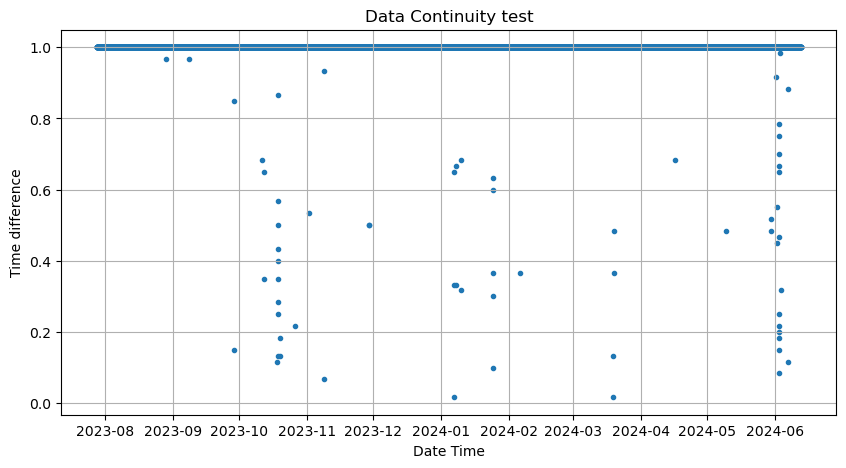

In [247]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['dt'],df_filtered['time_diff_hour'], marker='.')
plt.title('Data Continuity test')
plt.xlabel('Date Time')
plt.ylabel('Time difference')
plt.grid(True)
plt.show()

In [249]:
test = df_filtered[df_filtered["time_diff_hour"] <= 0.5]
print(test.shape)
test

(40, 12)


,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D,time_diff,time_diff_hour
1500,2023-09-28 14:00:00,4.059023,NaN,4.147519,NaN,NaN,5.127561,8.305790,NaN,3.830366,0 days 00:09:00,0.150000
1832,2023-10-12 08:00:00,4.079150,NaN,4.170213,NaN,NaN,5.284152,8.235581,NaN,3.849143,0 days 00:21:00,0.350000
1982,2023-10-18 13:00:00,4.082376,NaN,4.186213,NaN,NaN,5.240361,8.213144,NaN,3.858613,0 days 00:07:00,0.116667
1984,2023-10-18 14:00:00,4.082503,4.274213,4.186292,NaN,NaN,5.239829,8.213224,NaN,3.858708,0 days 00:26:00,0.433333
1985,2023-10-18 14:21:00,NaN,NaN,NaN,NaN,4.240848,NaN,NaN,NaN,NaN,0 days 00:21:00,0.350000
1986,2023-10-18 14:45:00,NaN,NaN,NaN,4.255044,NaN,NaN,NaN,NaN,NaN,0 days 00:24:00,0.400000
1987,2023-10-18 15:00:00,4.083107,4.275073,4.188713,4.249497,4.238025,5.238863,8.212866,NaN,3.858773,0 days 00:15:00,0.250000
1989,2023-10-18 15:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.708101,NaN,0 days 00:30:00,0.500000
1990,2023-10-18 16:00:00,4.083423,4.274505,4.192072,4.252175,4.238313,5.237623,8.214306,NaN,3.859401,0 days 00:17:00,0.283333
1991,2023-10-18 16:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.715425,NaN,0 days 00:08:00,0.133333


In [260]:
dates = test["dt"]
dates

1500   2023-09-28 14:00:00
1832   2023-10-12 08:00:00
1982   2023-10-18 13:00:00
1984   2023-10-18 14:00:00
1985   2023-10-18 14:21:00
1986   2023-10-18 14:45:00
1987   2023-10-18 15:00:00
1989   2023-10-18 15:43:00
1990   2023-10-18 16:00:00
1991   2023-10-18 16:08:00
2013   2023-10-19 13:00:00
2015   2023-10-19 14:00:00
2184   2023-10-26 14:00:00
2503   2023-11-08 18:04:00
2997   2023-11-29 07:30:00
2998   2023-11-29 08:00:00
3928   2024-01-07 00:40:00
3929   2024-01-07 01:00:00
3954   2024-01-08 01:00:00
4003   2024-01-10 01:00:00
4353   2024-01-24 14:06:00
4355   2024-01-24 15:00:00
4356   2024-01-24 15:22:00
4648   2024-02-05 18:00:00
5676   2024-03-19 13:08:00
5677   2024-03-19 13:09:00
5678   2024-03-19 13:31:00
5679   2024-03-19 14:00:00
6907   2024-05-09 15:00:00
7399   2024-05-30 02:00:00
7473   2024-06-02 02:00:00
7494   2024-06-02 22:00:00
7495   2024-06-02 22:12:00
7496   2024-06-02 22:21:00
7497   2024-06-02 22:49:00
7498   2024-06-02 23:00:00
7501   2024-06-03 00:00:00
7

In [253]:
df_dates = dates - pd.Timedelta(hours=1)
df_dates

1500   2023-09-28 13:00:00
1832   2023-10-12 07:00:00
1982   2023-10-18 12:00:00
1984   2023-10-18 13:00:00
1985   2023-10-18 13:21:00
1986   2023-10-18 13:45:00
1987   2023-10-18 14:00:00
1989   2023-10-18 14:43:00
1990   2023-10-18 15:00:00
1991   2023-10-18 15:08:00
2013   2023-10-19 12:00:00
2015   2023-10-19 13:00:00
2184   2023-10-26 13:00:00
2503   2023-11-08 17:04:00
2997   2023-11-29 06:30:00
2998   2023-11-29 07:00:00
3928   2024-01-06 23:40:00
3929   2024-01-07 00:00:00
3954   2024-01-08 00:00:00
4003   2024-01-10 00:00:00
4353   2024-01-24 13:06:00
4355   2024-01-24 14:00:00
4356   2024-01-24 14:22:00
4648   2024-02-05 17:00:00
5676   2024-03-19 12:08:00
5677   2024-03-19 12:09:00
5678   2024-03-19 12:31:00
5679   2024-03-19 13:00:00
6907   2024-05-09 14:00:00
7399   2024-05-30 01:00:00
7473   2024-06-02 01:00:00
7494   2024-06-02 21:00:00
7495   2024-06-02 21:12:00
7496   2024-06-02 21:21:00
7497   2024-06-02 21:49:00
7498   2024-06-02 22:00:00
7501   2024-06-02 23:00:00
7